In [5]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import os
import xarray
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy
from ll_xy import lonlat_to_xy
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import h5py
import itertools
import tqdm
from pykml import parser
import shapely

In [10]:
img_dir = './Browser_images'
file = '2024-01-01-00:00_2024-01-01-23:59_Sentinel-1_DH_HH_-_decibel_gamma0.tiff'
xds = xarray.open_dataset(f'{img_dir}/{file}',engine="rasterio")

basemap = np.array(xds.to_array())[0,0]

gt_lon = np.array(xds.x)
gt_lat = np.array(xds.y)
longrid = np.repeat(gt_lon[np.newaxis,:],len(gt_lat),axis=0)
latgrid = np.repeat(gt_lat[:,np.newaxis],len(gt_lon),axis=1)

# # This requires wrangle_polygon.ipynb to run first

dfpoly = pd.read_csv('fjord_poly_coords.csv')

polylons = np.array(dfpoly['lons'])
polylats = np.array(dfpoly['lats'])

poly_coords = [(x,y) for x,y in zip(dfpoly['x'],
                                    dfpoly['y'])]


In [6]:
osten_dir = '/home/robbie/uit_mnt/scratch/robbie/robbie_scratch'

filename = "ostenfeld.h5"

with h5py.File(f'{osten_dir}/{filename}', "r") as f:
    keys = list(f.keys())

In [10]:
# sizes = []

# for key in tqdm.tqdm(keys):

#     df = pd.read_hdf(f'{osten_dir}/{filename}',key=key)

#     sizes.append(df.shape[0])

100%|███████████████████████████████████████| 1022/1022 [08:57<00:00,  1.90it/s]


In [8]:
def get_date_from_key(key):
    code = key[5:-2]
    year = code[:4]
    month=code[4:6]
    day=code[6:8]

    return {'year':year,'month':month,'day':day}

# get_date_from_key(keys[)

  0%|                                                    | 0/30 [00:00<?, ?it/s]

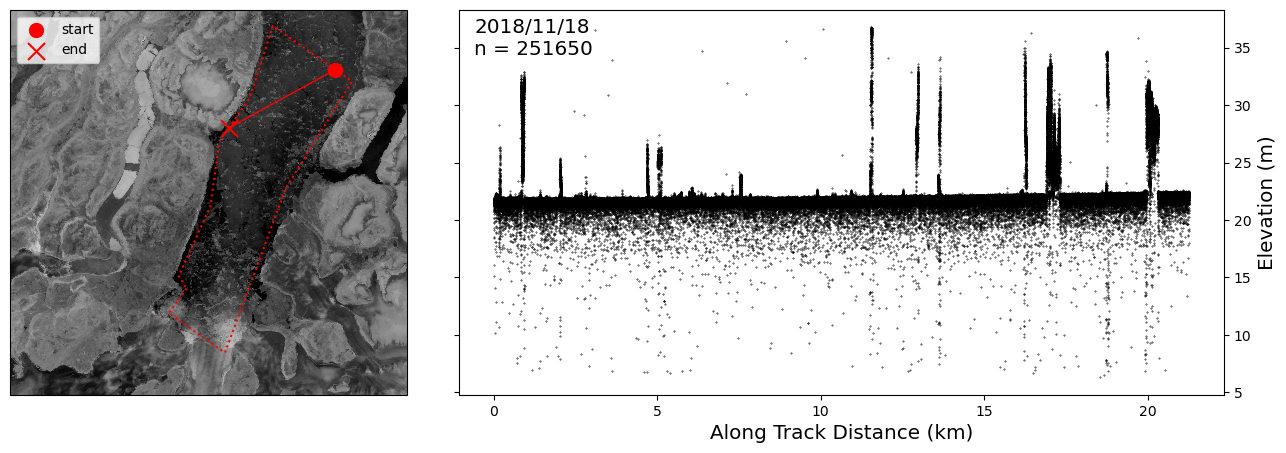

100%|███████████████████████████████████████████| 30/30 [00:12<00:00,  2.45it/s]


In [12]:
for key in tqdm.tqdm(keys[:30]):

    if "055244_3" in key:
    # if "" in key:
    
        df = pd.read_hdf(f'{osten_dir}/{filename}',key=key)
    
        if df.shape[0]>300:
        
            x0,y0 = df.iloc[0]['x'],df.iloc[0]['y']
            xl,yl = df.iloc[-1]['x'],df.iloc[-1]['y']
        
            df['along_track']= np.sqrt((df['x']-x0)**2+(df['y']-y0)**2)
        
            
            fig = plt.figure(figsize=(16,5))
    
            gs = fig.add_gridspec(12,8)
            
            ax1 = fig.add_subplot(gs[:,0:3],projection=ccrs.NorthPolarStereo())
            ax2 = fig.add_subplot(gs[:,3:12])
    
            date = get_date_from_key(key)
            
            ax1.set_extent([-45.8,-47,82.1,81.4], ccrs.PlateCarree())
            
            ax1.pcolormesh(longrid,latgrid,basemap,
                         transform=ccrs.PlateCarree(),zorder=2,cmap='grey')
        
        
            ax1.plot([x0,xl],[y0,yl],transform=ccrs.epsg(3408),zorder=3,color='r',lw=1)
            ax1.scatter([x0],[y0],transform=ccrs.epsg(3408),zorder=3,color='r',marker='o',label='start',s=100)
            ax1.scatter([xl],[yl],transform=ccrs.epsg(3408),zorder=3,color='r',marker='x',label='end',s=150)
            
            ax1.plot(polylons,
                     polylats,transform=ccrs.PlateCarree(),zorder=3,color='r',ls=':')
            ax1.legend(loc='upper left')
    
            ax2.annotate(f"{date['year']}/{date['month']}/{date['day']}\nn = {df.shape[0]}",xy=(0.02,0.98),xycoords='axes fraction',fontsize='x-large',va='top')
            ax2.scatter(df['along_track']/1000,df['h'],marker='.',alpha=1,s=0.5,color='k')
            ax2.set_xlabel('Along Track Distance (km)',fontsize='x-large')
            ax2.set_ylabel('Elevation (m)',fontsize='x-large')
            ax2.yaxis.tick_right()
            ax2.yaxis.set_label_position('right')
    
            ax2.yaxis.set_ticks_position('both')
    
            plt.savefig(f'./profile_pics/{key}.png',dpi=400,bbox_inches='tight')

        
        plt.show()

  0%|                                                    | 0/30 [00:00<?, ?it/s]

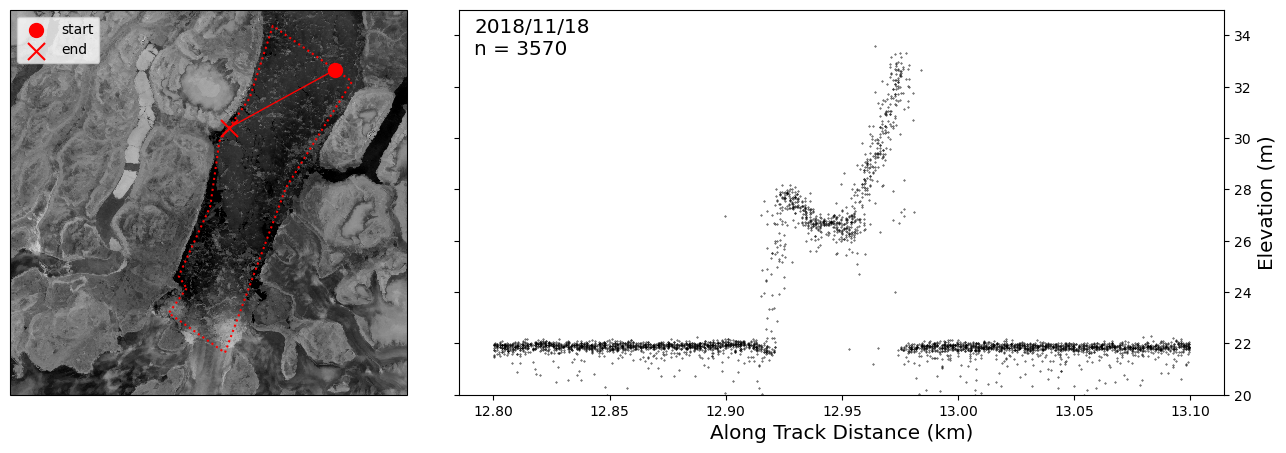

100%|███████████████████████████████████████████| 30/30 [00:08<00:00,  3.45it/s]


In [19]:
for key in tqdm.tqdm(keys[:30]):

    if "055244_3" in key:
    # if "" in key:
    
        df = pd.read_hdf(f'{osten_dir}/{filename}',key=key)
    
        if df.shape[0]>300:
        
            x0,y0 = df.iloc[0]['x'],df.iloc[0]['y']
            xl,yl = df.iloc[-1]['x'],df.iloc[-1]['y']
        
            df['along_track']= np.sqrt((df['x']-x0)**2+(df['y']-y0)**2)

            df = df[(df['along_track']<13100)&(df['along_track']>12800)]
        
            
            fig = plt.figure(figsize=(16,5))
    
            gs = fig.add_gridspec(12,8)
            
            ax1 = fig.add_subplot(gs[:,0:3],projection=ccrs.NorthPolarStereo())
            ax2 = fig.add_subplot(gs[:,3:12])
    
            date = get_date_from_key(key)
            
            ax1.set_extent([-45.8,-47,82.1,81.4], ccrs.PlateCarree())
            
            ax1.pcolormesh(longrid,latgrid,basemap,
                         transform=ccrs.PlateCarree(),zorder=2,cmap='grey')
        
        
            ax1.plot([x0,xl],[y0,yl],transform=ccrs.epsg(3408),zorder=3,color='r',lw=1)
            ax1.scatter([x0],[y0],transform=ccrs.epsg(3408),zorder=3,color='r',marker='o',label='start',s=100)
            ax1.scatter([xl],[yl],transform=ccrs.epsg(3408),zorder=3,color='r',marker='x',label='end',s=150)
            
            ax1.plot(polylons,
                     polylats,transform=ccrs.PlateCarree(),zorder=3,color='r',ls=':')
            ax1.legend(loc='upper left')
    
            ax2.annotate(f"{date['year']}/{date['month']}/{date['day']}\nn = {df.shape[0]}",xy=(0.02,0.98),xycoords='axes fraction',fontsize='x-large',va='top')
            ax2.scatter(df['along_track']/1000,df['h'],marker='.',alpha=1,s=0.5,color='k')
            ax2.set_xlabel('Along Track Distance (km)',fontsize='x-large')
            ax2.set_ylabel('Elevation (m)',fontsize='x-large')
            ax2.yaxis.tick_right()
            ax2.yaxis.set_label_position('right')

            ax2.set_ylim(20,35)
    
            ax2.yaxis.set_ticks_position('both')
    
            plt.savefig(f'./profile_pics/{key}_hires.png',dpi=400,bbox_inches='tight')

        
        plt.show()

(array([452., 242., 189.,  58.,  34.,  22.,  15.,   5.,   3.,   2.]),
 array([1.000000e+00, 9.763920e+04, 1.952774e+05, 2.929156e+05,
        3.905538e+05, 4.881920e+05, 5.858302e+05, 6.834684e+05,
        7.811066e+05, 8.787448e+05, 9.763830e+05]),
 <BarContainer object of 10 artists>)

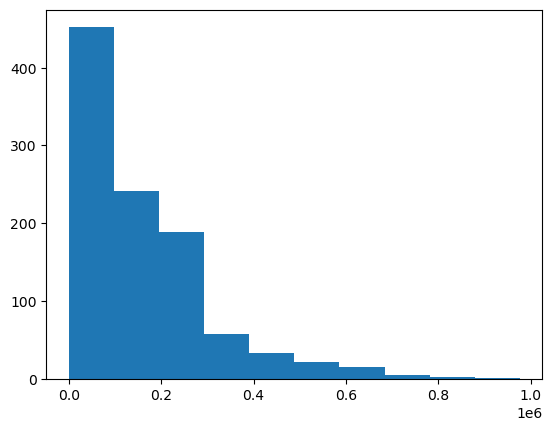

In [11]:
plt.hist(sizes)